# Data Analysis on Exercise 1

## load data set

the newest version of the dataset  is used [NEW ArtVis dataset delimited with semicolons](https://tuwel.tuwien.ac.at/mod/resource/view.php?id=2457815)

In [3]:
import polars as pl
from datetime import datetime

artvis_df = pl.read_csv(source='data/artvis_dump_NEW-semicolon.csv',has_header=True, separator=';',null_values=['\\N','0000-01-01'])
artvis_df = artvis_df.with_columns(
    pl.col('a.birthdate').replace("01/01/1900","1900-01-01")
)
artvis_df = artvis_df.with_columns(
    pl.col('a.birthdate').str.to_date('%Y-%m-%d',strict=True)
)
artvis_df = artvis_df.with_columns(
    pl.col('a.deathdate').str.to_date('%Y-%m-%d',strict=True)
)
#artvis_df.head(10)

In [3]:
artvis_df.describe()

statistic,a.id,a.firstname,a.lastname,a.gender,a.birthdate,a.deathdate,a.birthplace,a.deathplace,a.nationality,e.id,e.title,e.venue,e.startdate,e.type,e.paintings,e.country,e.city,e.latitude,e.longitude
str,f64,str,str,str,str,str,str,str,str,f64,str,str,f64,str,f64,str,str,f64,f64
"""count""",72078.0,"""71686""","""72078""","""71167""","""66419""","""65198""","""65412""","""61841""","""67295""",72078.0,"""72078""","""72078""",72078.0,"""72078""",72078.0,"""72072""","""71833""",71833.0,71833.0
"""null_count""",0.0,"""392""","""0""","""911""","""5659""","""6880""","""6666""","""10237""","""4783""",0.0,"""0""","""0""",0.0,"""0""",0.0,"""6""","""245""",245.0,245.0
"""mean""",4607.126557,null,null,null,"""1866-10-05 11:58:36.097000""","""1937-05-24 10:31:16.696000""",null,null,null,558.357904,null,null,1909.592941,null,3.657121,null,null,49.66627,7.109782
"""std""",3882.235215,null,null,null,null,null,null,null,null,417.797377,null,null,2.994311,null,9.523707,null,null,3.510304,18.742601
"""min""",1.0,"""1""","""Aarts""","""F""","""1445-01-01""","""1528-01-01""","""'s Graveland""","""'s Graveland""","""AM""",3.0,"""1-ая Футуристическая Выставка …","""Akademischer Verband für Liter…",1902.0,"""auction""",1.0,"""AT""","""-""",35.75,-122.4167
"""25%""",1043.0,null,null,null,"""1861-01-01""","""1926-01-01""",null,null,null,193.0,null,null,1907.0,null,1.0,null,null,48.15,3.716667
"""50%""",3664.0,null,null,null,"""1870-01-01""","""1940-01-01""",null,null,null,462.0,null,null,1910.0,null,2.0,null,null,50.1,11.583333
"""75%""",7434.0,null,null,null,"""1878-01-01""","""1952-01-01""",null,null,null,960.0,null,null,1912.0,null,3.0,null,null,51.514248,13.4
"""max""",13999.0,"""Ştefan""","""Žukovskij""","""M""","""1900-01-01""","""1999-01-01""","""Ростовский уезд""","""玄冶店""","""ZA""",1487.0,"""Художественная выставка „Мир И…","""Художественный салон 11""",1916.0,"""solo""",760.0,"""US""","""Zurich""",59.9333,139.5


## Export data to parquet file

In [6]:
artvis_df.write_parquet(file='../InfoVis24G4Ex2/data/artvis.parquet')

In [4]:
artvis_df.filter(pl.col('a.birthdate').dt.year() == 0)

a.id,a.firstname,a.lastname,a.gender,a.birthdate,a.deathdate,a.birthplace,a.deathplace,a.nationality,e.id,e.title,e.venue,e.startdate,e.type,e.paintings,e.country,e.city,e.latitude,e.longitude
i64,str,str,str,date,date,str,str,str,i64,str,str,i64,str,i64,str,str,f64,f64


In [17]:
print(pl.DataFrame(zip(artvis_df.columns,artvis_df.dtypes)).to_pandas().to_latex())

\begin{tabular}{lll}
\toprule
 & column_0 & column_1 \\
\midrule
0 & a.id & Int64 \\
1 & a.firstname & String \\
2 & a.lastname & String \\
3 & a.gender & String \\
4 & a.birthdate & Date \\
5 & a.deathdate & Date \\
6 & a.birthplace & String \\
7 & a.deathplace & String \\
8 & a.nationality & String \\
9 & e.id & Int64 \\
10 & e.title & String \\
11 & e.venue & String \\
12 & e.startdate & Int64 \\
13 & e.type & String \\
14 & e.paintings & Int64 \\
15 & e.country & String \\
16 & e.city & String \\
17 & e.latitude & Float64 \\
18 & e.longitude & Float64 \\
\bottomrule
\end{tabular}



In [5]:
artvis_df.filter(pl.col('a.deathdate').dt.year() == 0)

a.id,a.firstname,a.lastname,a.gender,a.birthdate,a.deathdate,a.birthplace,a.deathplace,a.nationality,e.id,e.title,e.venue,e.startdate,e.type,e.paintings,e.country,e.city,e.latitude,e.longitude
i64,str,str,str,date,date,str,str,str,i64,str,str,i64,str,i64,str,str,f64,f64


extract column names of artists and exhibitions

In [6]:
artist_columns = [e for e in artvis_df.columns if e.startswith('a.')]
exhibition_columns = [e for e in artvis_df.columns if e.startswith('e.')]

create 2 separate dataframes for artists and exhibitions 

In [7]:
artists_df = artvis_df.select(artist_columns).unique()
exhibitions_df = artvis_df.select(exhibition_columns).unique()

descriptive statistic on artists

In [8]:
artists_df.filter(pl.col('a.birthdate').dt.year() == 0)

a.id,a.firstname,a.lastname,a.gender,a.birthdate,a.deathdate,a.birthplace,a.deathplace,a.nationality
i64,str,str,str,date,date,str,str,str


In [9]:
artists_df.filter(pl.col('a.deathdate').dt.year() == 0)

a.id,a.firstname,a.lastname,a.gender,a.birthdate,a.deathdate,a.birthplace,a.deathplace,a.nationality
i64,str,str,str,date,date,str,str,str


In [10]:
artists_df.describe()

statistic,a.id,a.firstname,a.lastname,a.gender,a.birthdate,a.deathdate,a.birthplace,a.deathplace,a.nationality
str,f64,str,str,str,str,str,str,str,str
"""count""",13267.0,"""13063""","""13267""","""12754""","""10720""","""10323""","""10390""","""9369""","""11087"""
"""null_count""",0.0,"""204""","""0""","""513""","""2547""","""2944""","""2877""","""3898""","""2180"""
"""mean""",7017.188437,null,null,null,"""1864-03-16 21:53:19.702000""","""1934-06-27 08:41:50.898000""",null,null,null
"""std""",4027.401194,null,null,null,null,null,null,null,null
"""min""",1.0,"""1""","""Aarts""","""F""","""1445-01-01""","""1528-01-01""","""'s Graveland""","""'s Graveland""","""AM"""
"""25%""",3538.0,null,null,null,"""1859-01-01""","""1923-01-01""",null,null,null
"""50%""",6990.0,null,null,null,"""1871-01-01""","""1940-01-01""",null,null,null
"""75%""",10472.0,null,null,null,"""1879-01-01""","""1954-01-01""",null,null,null
"""max""",13999.0,"""Ştefan""","""Žukovskij""","""M""","""1900-01-01""","""1999-01-01""","""Ростовский уезд""","""玄冶店""","""ZA"""


In [24]:
artists_df.select('a.id').select(pl.len())

len
u32
13267


In [11]:
exhibitions_df.describe()

statistic,e.id,e.title,e.venue,e.startdate,e.type,e.paintings,e.country,e.city,e.latitude,e.longitude
str,f64,str,str,f64,str,f64,str,str,f64,f64
"""count""",9193.0,"""9193""","""9193""",9193.0,"""9193""",9193.0,"""9187""","""9180""",9180.0,9180.0
"""null_count""",0.0,"""0""","""0""",0.0,"""0""",0.0,"""6""","""13""",13.0,13.0
"""mean""",654.481888,null,null,1910.040792,null,12.951267,null,null,50.23345,11.019508
"""std""",430.524435,null,null,2.814154,null,24.162022,null,null,3.67528,15.814008
"""min""",3.0,"""1-ая Футуристическая Выставка …","""Akademischer Verband für Liter…",1902.0,"""auction""",1.0,"""AT""","""-""",35.75,-122.4167
"""25%""",280.0,null,null,1908.0,null,3.0,null,null,48.2167,4.333333
"""50%""",588.0,null,null,1910.0,null,7.0,null,null,50.1,13.4
"""75%""",1050.0,null,null,1912.0,null,13.0,null,null,52.35,16.3667
"""max""",1487.0,"""Художественная выставка „Мир И…","""Художественный салон 11""",1916.0,"""solo""",760.0,"""US""","""Zurich""",59.9333,139.5


In [12]:
exhibitions_df.select('e.id').select(pl.len())

len
u32
9193


## Artits

plots on artists

### Nationalities

<Axes: xlabel='a.nationality', ylabel='len'>

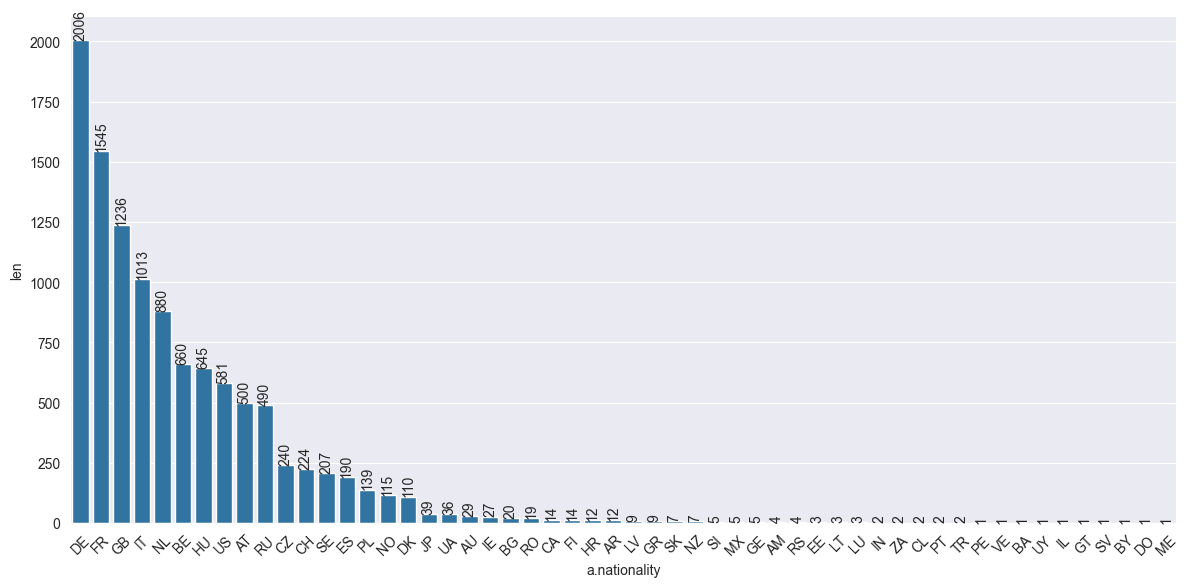

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

artvis_national = artists_df.group_by('a.nationality').len().sort('len', descending=True)
plt.figure(figsize=(12,6))
plot = sns.barplot(data=artvis_national, x='a.nationality', y='len', )
plt.setp(plot.get_xticklabels(), rotation=45)
plot.bar_label(plot.containers[0], rotation=90)
plt.tight_layout()
plot


### Gender

<Axes: xlabel='a.gender', ylabel='percent'>

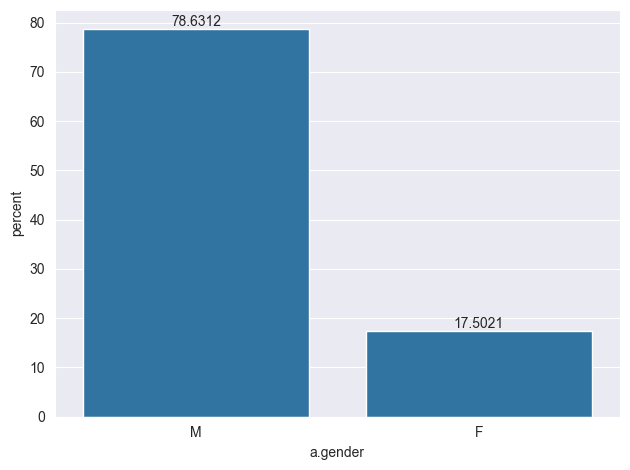

In [14]:
import seaborn as sns
from matplotlib import pyplot as plt

plot = sns.countplot(data=artists_df, x='a.gender', stat='percent')
plot.bar_label(plot.containers[0])
plt.tight_layout()
plt.savefig('data/gender.png')
plot

In [15]:
artvis_df.select('a.id','a.nationality').group_by('a.id','a.nationality').len().group_by('a.nationality').len().sort('len',descending=True)

a.nationality,len
str,u32
null,2180
"""DE""",2006
"""FR""",1545
"""GB""",1236
"""IT""",1013
…,…
"""VE""",1
"""UY""",1
"""ME""",1


## Exhibitions

plots on exhibitions

### Country

In [16]:
exhibitions_df.select('e.country').unique().count()

e.country
u32
20


<Axes: xlabel='e.country', ylabel='len'>

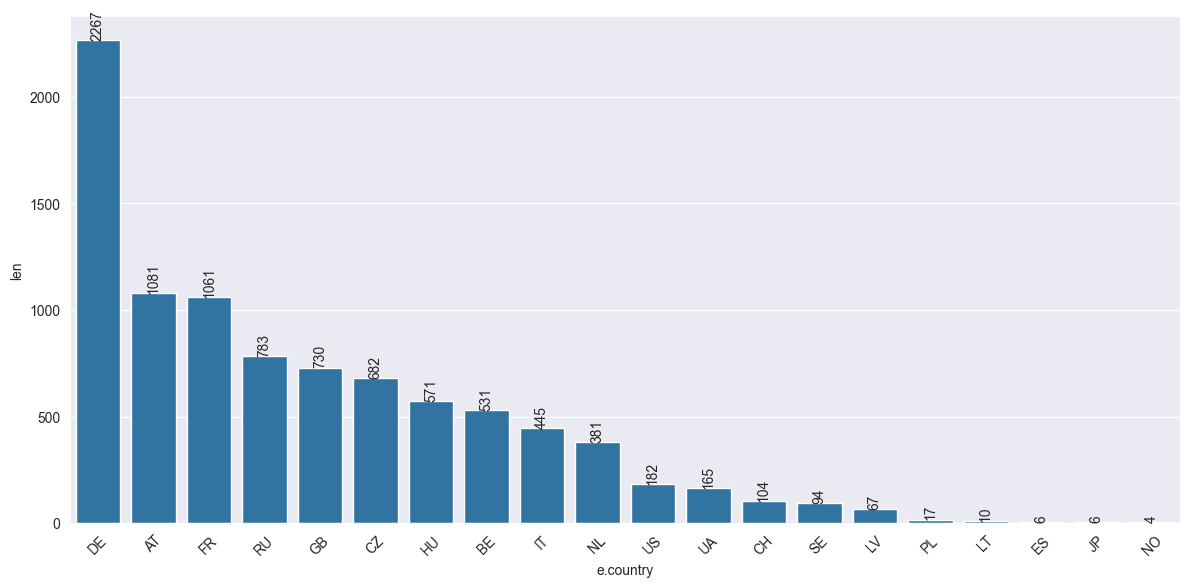

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
plot = sns.barplot(data=exhibitions_df.group_by('e.country').len().sort('len', descending=True), x='e.country', y='len', )
plt.setp(plot.get_xticklabels(), rotation=45)
plot.bar_label(plot.containers[0], rotation=90)
plt.tight_layout()
plt.savefig('data/exhibition_countrys.png')
plot

### Type of Exhibition

<Axes: xlabel='e.type', ylabel='len'>

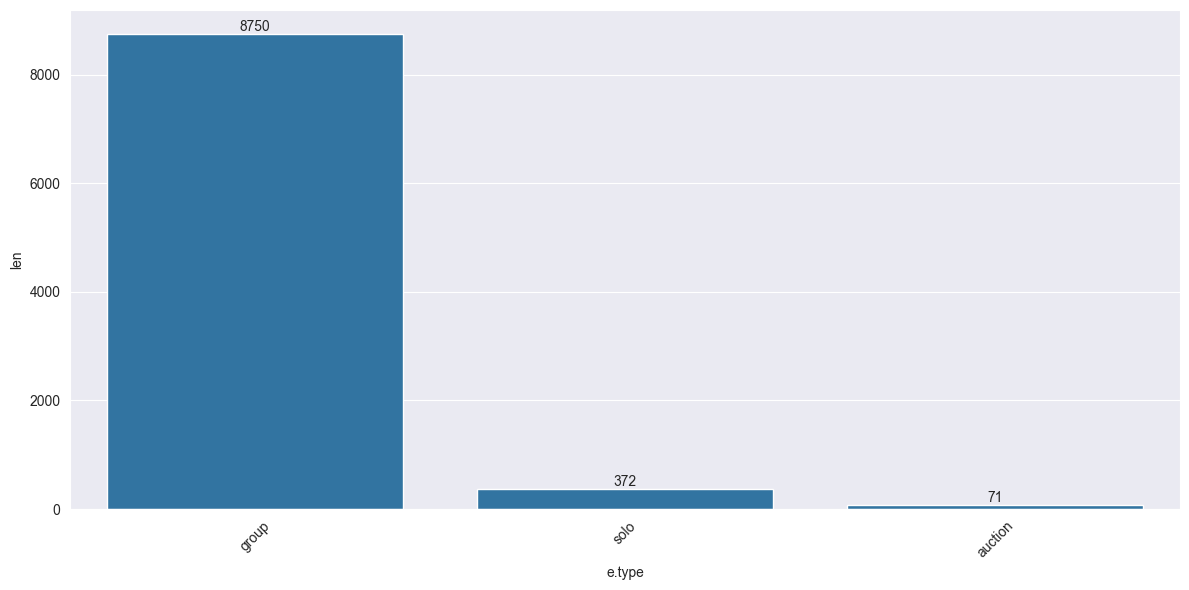

In [18]:
plt.figure(figsize=(12,6))
plot = sns.barplot(data=exhibitions_df.group_by('e.type').len().sort('len', descending=True), x='e.type', y='len', )
plt.setp(plot.get_xticklabels(), rotation=45)
plot.bar_label(plot.containers[0] )
plt.tight_layout()
plt.savefig('data/exhibition_types.png')
plot

### Paintings

<Axes: xlabel='e.startdate', ylabel='e.paintings'>

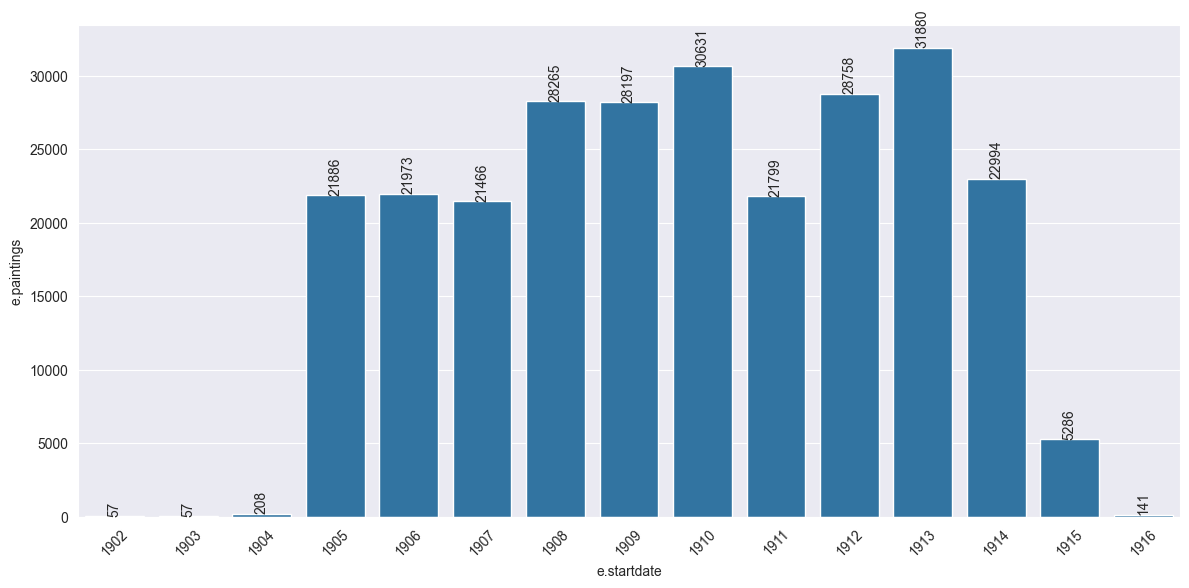

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
plot = sns.barplot(data=artvis_df.select('e.startdate','e.paintings').group_by('e.startdate').sum(), x='e.startdate', y='e.paintings' )
plt.setp(plot.get_xticklabels(), rotation=45)
plot.bar_label(plot.containers[0], rotation=90)
plt.tight_layout()
plt.savefig('data/exhibition_paintings.png')
plot

### City

In [33]:
exhibitions_df.select('e.city').unique().count()

e.city
u32
83


<Axes: xlabel='e.city', ylabel='len'>

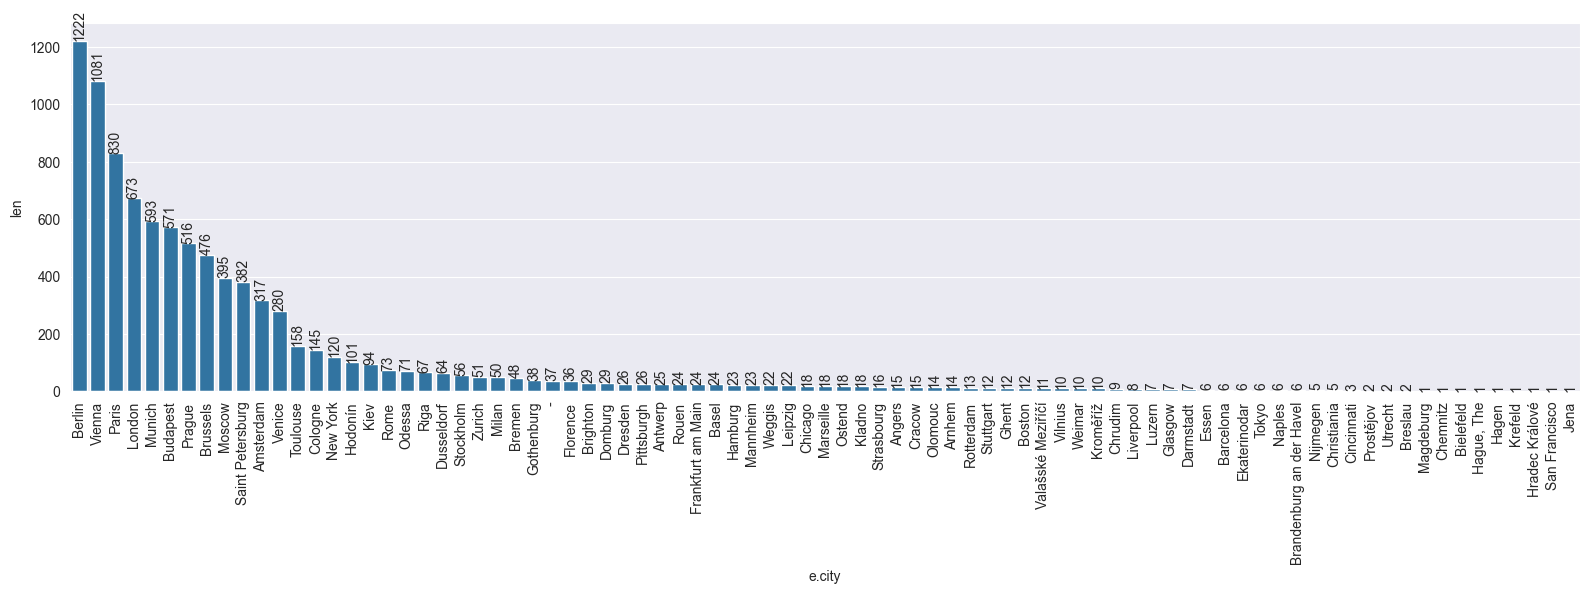

In [34]:
plt.figure(figsize=(16,6))
plot = sns.barplot(data=exhibitions_df.group_by('e.city').len().sort('len', descending=True), x='e.city', y='len')
plt.setp(plot.get_xticklabels(), rotation=90)
plot.bar_label(plot.containers[0], rotation=90 )
plt.tight_layout()
plt.savefig('data/exhibition_cities.png')
plot

## Venue

In [35]:
exhibitions_df.select('e.country','e.city','e.venue').group_by('e.country','e.city','e.venue').len().sort('len', descending=True)

e.country,e.city,e.venue,len
str,str,str,u32
"""DE""","""Berlin""","""Paul Cassirer""",419
"""AT""","""Vienna""","""Künstlerbund Hagen / Hagenbund""",230
"""DE""","""Berlin""","""Ausstellungshaus am Kurfürsten…",223
"""DE""","""Munich""","""Königliches Kunstausstellungsg…",218
"""DE""","""Berlin""","""Berliner Secession""",214
…,…,…,…
"""SE""","""Stockholm""","""Konstnärshuset""",1
"""GB""","""London""","""Burlington Fine Arts Club""",1
"""NL""","""Utrecht""","""Utrecht (exact location unknow…",1


In [36]:
artvis_df.select('e.venue').unique().count()

e.venue
u32
315


<Axes: xlabel='e.venue', ylabel='len'>

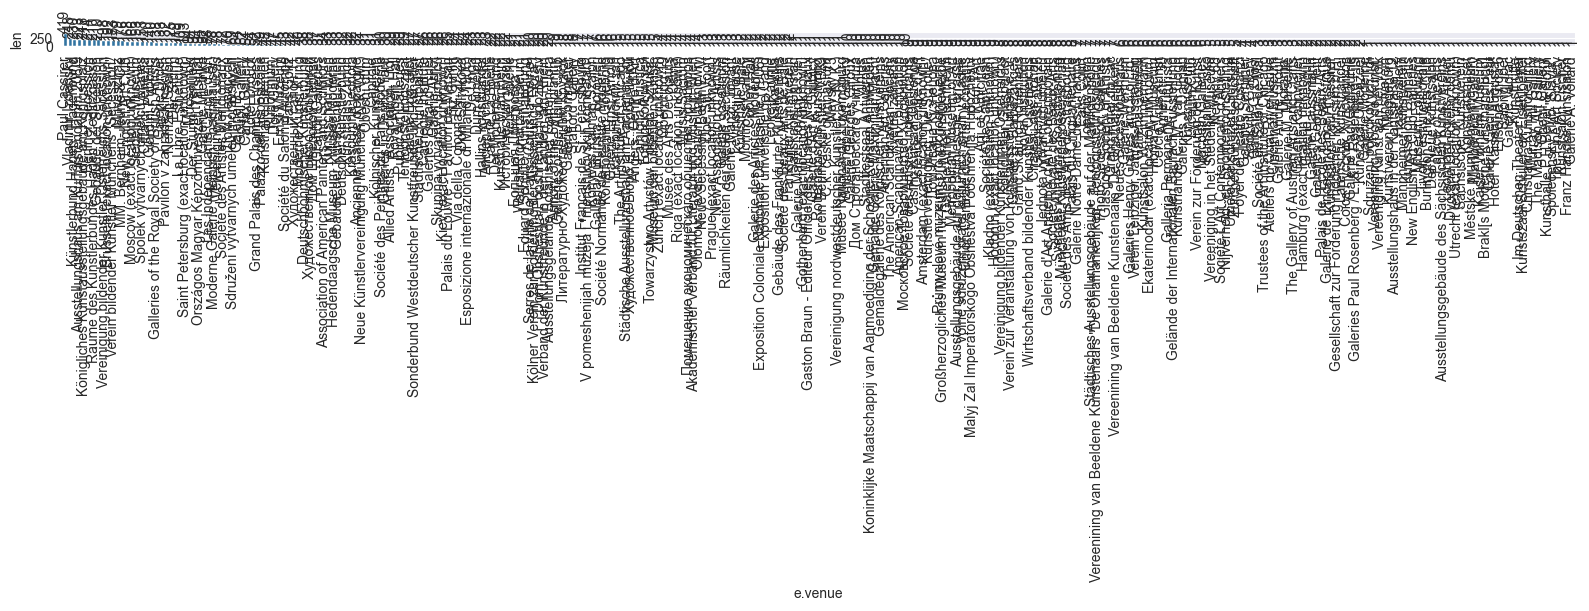

In [37]:
plt.figure(figsize=(16,6))
plot = sns.barplot(data=exhibitions_df.group_by('e.venue').len().sort('len', descending=True), x='e.venue', y='len')
plt.setp(plot.get_xticklabels(), rotation=90)
plot.bar_label(plot.containers[0], rotation=90 )
plt.tight_layout()
plt.savefig('data/exhibition_venue.png')
plot

In [13]:
artvis_df.select('e.title').unique().count()

e.title
u32
1007


### Startdate

In [25]:
print(exhibitions_df.select('e.startdate').min().item())
print(exhibitions_df.select('e.startdate').max().item())

1902
1916


<Axes: xlabel='e.startdate', ylabel='len'>

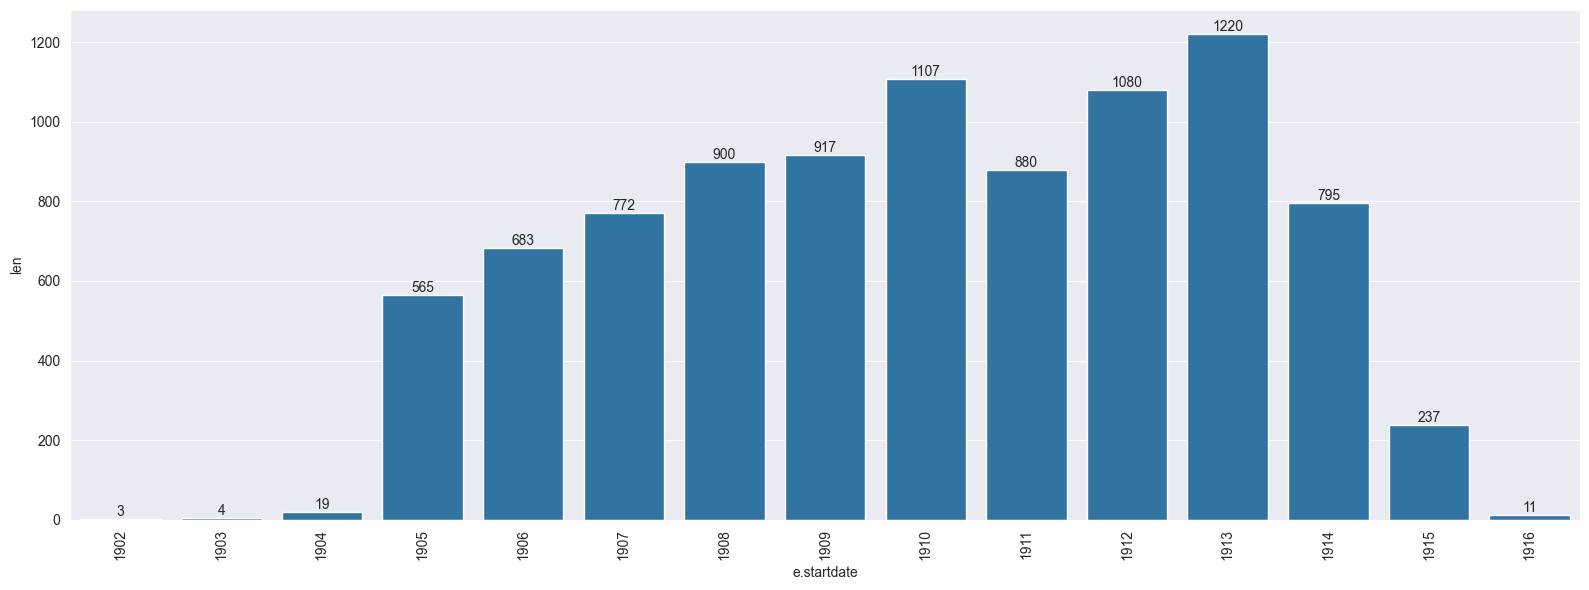

In [38]:
plt.figure(figsize=(16,6))
plot = sns.barplot(data=exhibitions_df.group_by('e.startdate').len().sort('len', descending=True), x='e.startdate', y='len')
plt.setp(plot.get_xticklabels(), rotation=90)
plot.bar_label(plot.containers[0] )
plt.tight_layout()
plt.savefig('data/exhibition_startdates.png')
plot

In [39]:
artvis_df.filter(pl.col('e.type')=='auction')

a.id,a.firstname,a.lastname,a.gender,a.birthdate,a.deathdate,a.birthplace,a.deathplace,a.nationality,e.id,e.title,e.venue,e.startdate,e.type,e.paintings,e.country,e.city,e.latitude,e.longitude
i64,str,str,str,date,date,str,str,str,i64,str,str,i64,str,i64,str,str,f64,f64
5,"""Vassily""","""Kandinsky""","""M""",1866-01-01,1944-01-01,"""Moscow""","""Neuilly-sur-Seine""","""RU""",1095,"""Vente Aux Enchères Publiques D…","""Hôtel Drouot""",1906,"""auction""",1,"""FR""","""Paris""",48.866667,2.333333
30,"""Émile""","""Bernard""","""M""",1868-01-01,1941-01-01,"""Lille""","""Paris""","""FR""",1131,"""Tableaux Modernes. Aquarelles,…","""Hôtel Drouot""",1908,"""auction""",2,"""FR""","""Paris""",48.866667,2.333333
37,"""Pierre""","""Bonnard""","""M""",1867-01-01,1947-01-01,"""Fontenay-aux-Roses""","""Le Cannet""","""FR""",1249,"""Collection de M. Albert Bernie…","""Hôtel Drouot""",1910,"""auction""",1,"""FR""","""Paris""",48.866667,2.333333
37,"""Pierre""","""Bonnard""","""M""",1867-01-01,1947-01-01,"""Fontenay-aux-Roses""","""Le Cannet""","""FR""",1271,"""Vente au bénéfice du Monument …","""Hôtel Drouot""",1911,"""auction""",1,"""FR""","""Paris""",48.866667,2.333333
37,"""Pierre""","""Bonnard""","""M""",1867-01-01,1947-01-01,"""Fontenay-aux-Roses""","""Le Cannet""","""FR""",1131,"""Tableaux Modernes. Aquarelles,…","""Hôtel Drouot""",1908,"""auction""",5,"""FR""","""Paris""",48.866667,2.333333
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
10649,"""Hendrik Martensz.""","""Sorgh""","""M""",1609-01-01,1670-01-01,"""Rotterdam""","""Rotterdam""","""NL""",1256,"""Collection Jean Dolent. Tablea…","""Hôtel Drouot""",1910,"""auction""",1,"""FR""","""Paris""",48.866667,2.333333
10650,"""Pieter van der""","""Werff""","""M""",1665-01-01,1722-01-01,"""Kralingen""","""Kralingen""","""NL""",1256,"""Collection Jean Dolent. Tablea…","""Hôtel Drouot""",1910,"""auction""",1,"""FR""","""Paris""",48.866667,2.333333
10651,"""École de""","""Pourbus""",null,null,null,null,null,null,1256,"""Collection Jean Dolent. Tablea…","""Hôtel Drouot""",1910,"""auction""",2,"""FR""","""Paris""",48.866667,2.333333


In [40]:
artvis_df.filter(pl.col('e.type')=='auction',pl.col('e.id')==1266).select('a.lastname','a.firstname','e.paintings').unique().sort('a.lastname','a.firstname')

a.lastname,a.firstname,e.paintings
str,str,i64
"""André""","""Albert""",1
"""Bonnard""","""Pierre""",19
"""Cézanne""","""Paul""",1
"""Daumier""","""Honoré""",1
"""Delacroix""","""Eugène""",1
…,…,…
"""Roussel""","""Ker-Xavier""",7
"""Seurat""","""Georges""",1
"""Vallotton""","""Félix""",1


In [41]:
artvis_df.filter(pl.col('e.type')=='auction').select('a.lastname').unique()

a.lastname
str
"""Renoir"""
"""Maes"""
"""Korochansky"""
"""Boughton-Leigh"""
"""Cézanne"""
…
"""Hals"""
"""Widhof"""
"""Bärwolf"""


In [42]:
artists_df.head(5)

a.id,a.firstname,a.lastname,a.gender,a.birthdate,a.deathdate,a.birthplace,a.deathplace,a.nationality
i64,str,str,str,date,date,str,str,str
804,"""Ernst""","""Burmester""","""M""",1877-01-01,1917-01-01,"""Ratzeburg""",null,"""DE"""
8292,null,"""Le Riche""",null,null,null,null,null,null
2987,"""Joseph Porphyre""","""Pinchon""","""M""",1871-01-01,1953-01-01,"""Amiens""","""Paris""","""FR"""
3023,"""Broncia""","""Koller""","""F""",1863-01-01,1934-01-01,"""Sanok""","""Vienna""","""AT"""
11959,"""Isabel""","""Beaubois de Montoriol""","""F""",1876-01-01,null,"""Bourges""",null,"""FR"""


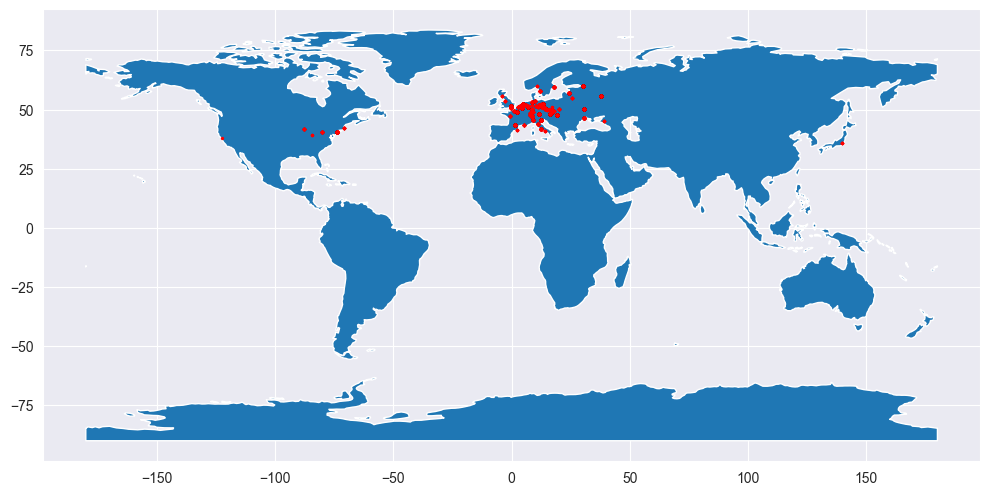

In [31]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geodatasets

geo_exhibitions_df = exhibitions_df.select('e.longitude','e.latitude').drop_nulls()

geometry = [Point(xy) for xy in zip(geo_exhibitions_df['e.longitude'], geo_exhibitions_df['e.latitude'])]
gdf = GeoDataFrame(geo_exhibitions_df, geometry=geometry)   

world = gpd.read_file(geodatasets.data.naturalearth.land['url'])
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=2);
plt.tight_layout()
plt.savefig('data/exhibition_world.png')

In [43]:
artvis_df.group_by('e.country','e.city','e.venue').agg(pl.col('e.paintings').sum()).sort(by=['e.country','e.city'])

e.country,e.city,e.venue,e.paintings
str,str,str,i64
null,"""-""","""Umělecké sdružení Sursum""",56
null,"""Christiania""","""Christiania Kunstforening""",62
"""AT""","""Vienna""","""Vereinigung bildender Künstler…",4507
"""AT""","""Vienna""","""Gebäude der Kunstschau Wien""",971
"""AT""","""Vienna""","""Opernring 19""",205
…,…,…,…
"""US""","""New York""","""Metropolitan Museum of Art""",181
"""US""","""New York""","""The American Scandinavian Soci…",148
"""US""","""New York""","""American-Scandinavian Foundati…",148


## Neo4j

In [44]:
",".join([entry.replace('.','_') for entry in artvis_df.columns])

'a_id,a_firstname,a_lastname,a_gender,a_birthdate,a_deathdate,a_birthplace,a_deathplace,a_nationality,e_id,e_title,e_venue,e_startdate,e_type,e_paintings,e_country,e_city,e_latitude,e_longitude'

In [45]:
",".join([f"{entry.replace('.','_')}={entry.replace('.','_')}" for entry in artvis_df.columns])

'a_id=a_id,a_firstname=a_firstname,a_lastname=a_lastname,a_gender=a_gender,a_birthdate=a_birthdate,a_deathdate=a_deathdate,a_birthplace=a_birthplace,a_deathplace=a_deathplace,a_nationality=a_nationality,e_id=e_id,e_title=e_title,e_venue=e_venue,e_startdate=e_startdate,e_type=e_type,e_paintings=e_paintings,e_country=e_country,e_city=e_city,e_latitude=e_latitude,e_longitude=e_longitude'

In [46]:
columns = ",".join([f"{entry.replace('.','_')}: ${entry.replace('.','_')}" for entry in artvis_df.columns])
create_statement = "CREATE (a:Artist {"+columns+"})"
create_statement


'CREATE (a:Artist {a_id: $a_id,a_firstname: $a_firstname,a_lastname: $a_lastname,a_gender: $a_gender,a_birthdate: $a_birthdate,a_deathdate: $a_deathdate,a_birthplace: $a_birthplace,a_deathplace: $a_deathplace,a_nationality: $a_nationality,e_id: $e_id,e_title: $e_title,e_venue: $e_venue,e_startdate: $e_startdate,e_type: $e_type,e_paintings: $e_paintings,e_country: $e_country,e_city: $e_city,e_latitude: $e_latitude,e_longitude: $e_longitude})'

In [50]:
from neo4j import GraphDatabase

URI = "neo4j://localhost:7687"
AUTH = ("neo4j", "infovis24")

def match_person_nodes(tx, name_filter):
    result = tx.run("""
        MATCH (p:Person) WHERE p.name STARTS WITH $filter
        RETURN p.name AS name ORDER BY name
        """, filter=name_filter)
    return list(result)  # return a list of Record objects

def create_a_e(s,a_id,a_firstname,a_lastname,a_gender,a_birthdate,a_deathdate,a_birthplace,a_deathplace,a_nationality,e_id,e_title,e_venue,e_startdate,e_type,e_paintings,e_country,e_city,e_latitude,e_longitude):
    s.execute_write(_create_a_e, a_id,a_firstname,a_lastname,a_gender,a_birthdate,a_deathdate,a_birthplace,a_deathplace,a_nationality, e_id,e_title,e_venue,e_startdate,e_type,e_paintings,e_country,e_city,e_latitude,e_longitude)

def create_artist(s, a_id,a_firstname,a_lastname,a_gender,a_birthdate,a_deathdate,a_birthplace,a_deathplace,a_nationality,e_id):
    s.execute_write(_create_artits, a_id,a_firstname,a_lastname,a_gender,a_birthdate,a_deathdate,a_birthplace,a_deathplace,a_nationality,e_id)

def create_exibition(s, e_id,e_title,e_venue,e_startdate,e_type,e_paintings,e_country,e_city,e_latitude,e_longitude ):
     s.execute_write(_create_exhibition, e_id,e_title,e_venue,e_startdate,e_type,e_paintings,e_country,e_city,e_latitude,e_longitude)

def _create_artits(tx, a_id,a_firstname,a_lastname,a_gender,a_birthdate,a_deathdate,a_birthplace,a_deathplace,a_nationality,e_id):
        query = (
            "CREATE (a:Artist {a_id: $a_id,a_firstname: $a_firstname,a_lastname: $a_lastname,a_gender: $a_gender,a_birthdate: $a_birthdate,a_deathdate: $a_deathdate,a_birthplace: $a_birthplace,a_deathplace: $a_deathplace,a_nationality: $a_nationality,e_id: $e_id})"
        )
        tx.run(query, a_id=a_id,a_firstname=a_firstname,a_lastname=a_lastname,a_gender=a_gender,a_birthdate=a_birthdate,a_deathdate=a_deathdate,a_birthplace=a_birthplace,a_deathplace=a_deathplace,a_nationality=a_nationality,e_id=e_id)

def _create_a_e(tx, a_id,a_firstname,a_lastname,a_gender,a_birthdate,a_deathdate,a_birthplace,a_deathplace,a_nationality,e_id,e_title,e_venue,e_startdate,e_type,e_paintings,e_country,e_city,e_latitude,e_longitude):
        query = (
            "CREATE (a:Artist {a_id: $a_id,a_firstname: $a_firstname,a_lastname: $a_lastname,a_gender: $a_gender,a_birthdate: $a_birthdate,a_deathdate: $a_deathdate,a_birthplace: $a_birthplace,a_deathplace: $a_deathplace,a_nationality: $a_nationality,e_id: $e_id, e_title: $e_title,e_venue: $e_venue,e_startdate: $e_startdate,e_type: $e_type,e_paintings: $e_paintings,e_country: $e_country,e_city: $e_city,e_latitude: $e_latitude,e_longitude: $e_longitude})"
        )
        tx.run(query, a_id=a_id,a_firstname=a_firstname,a_lastname=a_lastname,a_gender=a_gender,a_birthdate=a_birthdate,a_deathdate=a_deathdate,a_birthplace=a_birthplace,a_deathplace=a_deathplace,a_nationality=a_nationality,e_id=e_id, e_title=e_title,e_venue=e_venue,e_startdate=e_startdate,e_type=e_type,e_paintings=e_paintings,e_country=e_country,e_city=e_city,e_latitude=e_latitude,e_longitude=e_longitude)

def _create_exhibition(tx, e_id,e_title,e_venue,e_startdate,e_type,e_paintings,e_country,e_city,e_latitude,e_longitude):
        query = (
            "CREATE (e:Exhibiton {e_id: $e_id,e_title: $e_title,e_venue: $e_venue,e_startdate: $e_startdate,e_type: $e_type,e_paintings: $e_paintings,e_country: $e_country,e_city: $e_city,e_latitude: $e_latitude,e_longitude: $e_longitude})"
        )
        tx.run(query, e_id=e_id,e_title=e_title,e_venue=e_venue,e_startdate=e_startdate,e_type=e_type,e_paintings=e_paintings,e_country=e_country,e_city=e_city,e_latitude=e_latitude,e_longitude=e_longitude)


with GraphDatabase.driver(URI, auth=AUTH) as driver:
    driver.verify_connectivity()
    with driver.session(database="neo4j") as session:
        for row in artvis_df.iter_rows():
            #print(row[0:9])
            create_a_e(session, *row)
            #create_artist(session,*row[0:10])
            #create_exibition(session,*row[9:])



BufferError: Existing exports of data: object cannot be re-sized

MATCH (a:Artist)
WITH DISTINCT a.a_gender AS gender
CREATE (:Gender {value: gender})

MATCH (a:Artist), (g:Gender {value: a.a_gender})
CREATE (a)-[:HAS_GENDER]->(g)

MATCH (a:Artist) REMOVE a.a_gender

MATCH (a:Artist) REMOVE a.e_title, a.e_venue,a.e_startdate,a. e_type,a.e_paintings,a.e_country,a.e_city,a.e_latitude,a.e_longitude

MATCH (a:Artist)
WITH DISTINCT a.a_nationality AS nationality
CREATE (:Nationality {value: nationality})

MATCH (a:Artist)
WITH DISTINCT a.a_nationality AS nationality
CREATE (:Nationality {value: nationality})

MATCH (a:Artist), (n:Nationality {value: a.a_nationality})
CREATE (a)-[:HAS_NATIONALITY]->(n)

MATCH (a:Artist) REMOVE a.a_nationality

MATCH (a:Artist),(e:Exhibiton) WHERE e.e_id = a.e_id CREATE (a)-[:EXHIBITS_AT]->(e)




In [49]:
artvis_df.filter(pl.col('a.id')==1)

a.id,a.firstname,a.lastname,a.gender,a.birthdate,a.deathdate,a.birthplace,a.deathplace,a.nationality,e.id,e.title,e.venue,e.startdate,e.type,e.paintings,e.country,e.city,e.latitude,e.longitude
i64,str,str,str,date,date,str,str,str,i64,str,str,i64,str,i64,str,str,f64,f64
1,"""William Bernard""","""Adeney""","""M""",1878-01-01,1966-01-01,"""London""","""London""","""GB""",489,"""Second Post-Impressionist Exhi…","""Grafton Galleries""",1912,"""group""",4,"""GB""","""London""",51.514248,-0.093145
1,"""William Bernard""","""Adeney""","""M""",1878-01-01,1966-01-01,"""London""","""London""","""GB""",618,"""Exhibition of the Camden Town …","""Public Art Galleries""",1913,"""group""",6,"""GB""","""Brighton""",50.833333,-0.15
1,"""William Bernard""","""Adeney""","""M""",1878-01-01,1966-01-01,"""London""","""London""","""GB""",720,"""The Second Exhibition of Works…","""Goupil Gallery""",1915,"""group""",4,"""GB""","""London""",51.514248,-0.093145
1,"""William Bernard""","""Adeney""","""M""",1878-01-01,1966-01-01,"""London""","""London""","""GB""",729,"""Third Exhibition of Works by M…","""Goupil Gallery""",1915,"""group""",5,"""GB""","""London""",51.514248,-0.093145
1,"""William Bernard""","""Adeney""","""M""",1878-01-01,1966-01-01,"""London""","""London""","""GB""",650,"""The First Exhibition of Works …","""Goupil Gallery""",1914,"""group""",5,"""GB""","""London""",51.514248,-0.093145
1,"""William Bernard""","""Adeney""","""M""",1878-01-01,1966-01-01,"""London""","""London""","""GB""",680,"""Twentieth Century Art. A Revie…","""Whitechapel Art Gallery""",1914,"""group""",3,"""GB""","""London""",51.514248,-0.093145
1,"""William Bernard""","""Adeney""","""M""",1878-01-01,1966-01-01,"""London""","""London""","""GB""",724,"""Vorticist Exhibition""","""Doré Gallery""",1915,"""group""",1,"""GB""","""London""",51.514248,-0.093145


In [44]:
artvis_df.filter(pl.col('e.id')==489)

a.id,a.firstname,a.lastname,a.gender,a.birthdate,a.deathdate,a.birthplace,a.deathplace,a.nationality,e.id,e.title,e.venue,e.startdate,e.type,e.paintings,e.country,e.city,e.latitude,e.longitude
i64,str,str,str,date,date,str,str,str,i64,str,str,i64,str,i64,str,str,f64,f64
1,"""William Bernard""","""Adeney""","""M""",1878-01-01,1966-01-01,"""London""","""London""","""GB""",489,"""Second Post-Impressionist Exhi…","""Grafton Galleries""",1912,"""group""",4,"""GB""","""London""",51.514248,-0.093145
24,"""Vanessa""","""Bell""","""F""",1879-01-01,1961-01-01,"""Kensington""","""West Sussex""","""GB""",489,"""Second Post-Impressionist Exhi…","""Grafton Galleries""",1912,"""group""",4,"""GB""","""London""",51.514248,-0.093145
37,"""Pierre""","""Bonnard""","""M""",1867-01-01,1947-01-01,"""Fontenay-aux-Roses""","""Le Cannet""","""FR""",489,"""Second Post-Impressionist Exhi…","""Grafton Galleries""",1912,"""group""",3,"""GB""","""London""",51.514248,-0.093145
41,"""Georges""","""Braque""","""M""",1882-01-01,1963-01-01,"""Argenteuil""","""Paris""","""FR""",489,"""Second Post-Impressionist Exhi…","""Grafton Galleries""",1912,"""group""",4,"""GB""","""London""",51.514248,-0.093145
58,"""Paul""","""Cézanne""","""M""",1839-01-01,1906-01-01,"""Aix-en-Provence""","""Aix-en-Provence""","""FR""",489,"""Second Post-Impressionist Exhi…","""Grafton Galleries""",1912,"""group""",11,"""GB""","""London""",51.514248,-0.093145
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
10788,"""Jessie""","""Etchells""","""F""",1892-01-01,1933-01-01,"""Newcastle upon Tyne""","""London""","""GB""",489,"""Second Post-Impressionist Exhi…","""Grafton Galleries""",1912,"""group""",1,"""GB""","""London""",51.514248,-0.093145
10835,"""Charles""","""Vilette""","""M""",1885-01-01,1946-01-01,"""Argenteuil""","""Paris""","""FR""",489,"""Second Post-Impressionist Exhi…","""Grafton Galleries""",1912,"""group""",2,"""GB""","""London""",51.514248,-0.093145
10882,"""Boris""","""Anrep""","""M""",1883-01-01,1969-01-01,"""Saint Petersburg""","""London""","""RU""",489,"""Second Post-Impressionist Exhi…","""Grafton Galleries""",1912,"""group""",6,"""GB""","""London""",51.514248,-0.093145


In [58]:
#artist_columns.append('e.id')
artist_columns
#exhibition_columns.remove('e.paintings')
exhibition_columns

artists1_df = artvis_df.select(artist_columns).unique()
exhibitions1_df = artvis_df.select(exhibition_columns).unique()


In [62]:
from neo4j import GraphDatabase

URI = "neo4j://localhost:7687"
AUTH = ("neo4j", "infovis24")

def match_person_nodes(tx, name_filter):
    result = tx.run("""
        MATCH (p:Person) WHERE p.name STARTS WITH $filter
        RETURN p.name AS name ORDER BY name
        """, filter=name_filter)
    return list(result)  # return a list of Record objects

def create_a_e(s,a_id,a_firstname,a_lastname,a_gender,a_birthdate,a_deathdate,a_birthplace,a_deathplace,a_nationality,e_id,e_title,e_venue,e_startdate,e_type,e_paintings,e_country,e_city,e_latitude,e_longitude):
    s.execute_write(_create_a_e, a_id,a_firstname,a_lastname,a_gender,a_birthdate,a_deathdate,a_birthplace,a_deathplace,a_nationality, e_id,e_title,e_venue,e_startdate,e_type,e_paintings,e_country,e_city,e_latitude,e_longitude)

def create_artist(s, a_id,a_firstname,a_lastname,a_gender,a_birthdate,a_deathdate,a_birthplace,a_deathplace,a_nationality,e_id):
    s.execute_write(_create_artits, a_id,a_firstname,a_lastname,a_gender,a_birthdate,a_deathdate,a_birthplace,a_deathplace,a_nationality,e_id)

def create_exibition(s, e_id,e_title,e_venue,e_startdate,e_type,e_country,e_city,e_latitude,e_longitude ):
     s.execute_write(_create_exhibition, e_id,e_title,e_venue,e_startdate,e_type,e_country,e_city,e_latitude,e_longitude)

def _create_artits(tx, a_id,a_firstname,a_lastname,a_gender,a_birthdate,a_deathdate,a_birthplace,a_deathplace,a_nationality,e_id):
        query = (
            "CREATE (a:Artist {a_id: $a_id,a_firstname: $a_firstname,a_lastname: $a_lastname,a_gender: $a_gender,a_birthdate: $a_birthdate,a_deathdate: $a_deathdate,a_birthplace: $a_birthplace,a_deathplace: $a_deathplace,a_nationality: $a_nationality,e_id: $e_id})"
        )
        tx.run(query, a_id=a_id,a_firstname=a_firstname,a_lastname=a_lastname,a_gender=a_gender,a_birthdate=a_birthdate,a_deathdate=a_deathdate,a_birthplace=a_birthplace,a_deathplace=a_deathplace,a_nationality=a_nationality,e_id=e_id)

def _create_a_e(tx, a_id,a_firstname,a_lastname,a_gender,a_birthdate,a_deathdate,a_birthplace,a_deathplace,a_nationality,e_id,e_title,e_venue,e_startdate,e_type,e_country,e_city,e_latitude,e_longitude):
        query = (
            "CREATE (a:Artist {a_id: $a_id,a_firstname: $a_firstname,a_lastname: $a_lastname,a_gender: $a_gender,a_birthdate: $a_birthdate,a_deathdate: $a_deathdate,a_birthplace: $a_birthplace,a_deathplace: $a_deathplace,a_nationality: $a_nationality,e_id: $e_id, e_title: $e_title,e_venue: $e_venue,e_startdate: $e_startdate,e_type: $e_type,e_country: $e_country,e_city: $e_city,e_latitude: $e_latitude,e_longitude: $e_longitude})"
        )
        tx.run(query, a_id=a_id,a_firstname=a_firstname,a_lastname=a_lastname,a_gender=a_gender,a_birthdate=a_birthdate,a_deathdate=a_deathdate,a_birthplace=a_birthplace,a_deathplace=a_deathplace,a_nationality=a_nationality,e_id=e_id, e_title=e_title,e_venue=e_venue,e_startdate=e_startdate,e_type=e_type,e_country=e_country,e_city=e_city,e_latitude=e_latitude,e_longitude=e_longitude)

def _create_exhibition(tx, e_id,e_title,e_venue,e_startdate,e_type,e_country,e_city,e_latitude,e_longitude):
        query = (
            "CREATE (e:Exhibiton {e_id: $e_id,e_title: $e_title,e_venue: $e_venue,e_startdate: $e_startdate,e_type: $e_type,e_country: $e_country,e_city: $e_city,e_latitude: $e_latitude,e_longitude: $e_longitude})"
        )
        tx.run(query, e_id=e_id,e_title=e_title,e_venue=e_venue,e_startdate=e_startdate,e_type=e_type,e_country=e_country,e_city=e_city,e_latitude=e_latitude,e_longitude=e_longitude)


with GraphDatabase.driver(URI, auth=AUTH) as driver:
    driver.verify_connectivity()
    with driver.session(database="neo4j") as session:
        for row in exhibitions1_df.iter_rows():
            create_exibition(session,*row)


with GraphDatabase.driver(URI, auth=AUTH) as driver:
    driver.verify_connectivity()
    with driver.session(database="neo4j") as session:
        for row in artists1_df.iter_rows():
            create_artist(session,*row)

